In [1]:
# Coin Toss Trading Strategy Simulation

import random as rm
import itertools as it
import matplotlib.pyplot as plt

# Simulate 100-day price series with small random fluctuations
def simulate_100() -> list[float]:
    """
    Simulates 100 days of price data starting at 100.
    Each day the price changes randomly between -3% and +1%.
    """
    price_seq = [100.0]

    for _ in range(99):  # Generate 99 additional prices
        new_price = price_seq[-1] * (1 + rm.uniform(-0.03, 0.01))
        price_seq.append(new_price)

    return price_seq


In [2]:
# Simulate random coin-flip based trades
def p_and_l_100() -> list[float]:
    """
    For 99 day-to-day intervals, randomly choose to 'buy' or 'sell'.
    Calculates profit/loss based on whether price moved in your favor.
    """
    price_lst = simulate_100()
    net_lst = []

    for i in range(99):  # 99 intervals from day 0 to day 98
        action = rm.choice(["buy", "sell"])
        
        if action == "buy":
            # Profit if price goes up the next day
            net_lst.append(price_lst[i+1] - price_lst[i])
        else:
            # Profit if price goes down the next day
            net_lst.append(price_lst[i] - price_lst[i+1])
    
    return net_lst


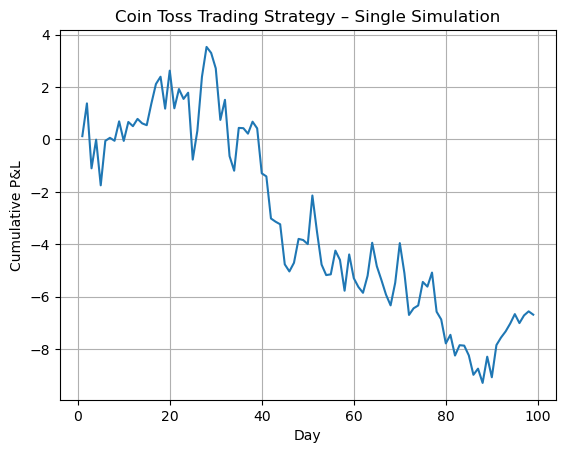

In [3]:
# Plot one run's cumulative P&L
pnl = p_and_l_100()
cumulative_pnl = list(it.accumulate(pnl))

plt.plot(range(1, 100), cumulative_pnl)  # Plot from day 1 to 99
plt.xlabel("Day")
plt.ylabel("Cumulative P&L")
plt.title("Coin Toss Trading Strategy – Single Simulation")
plt.grid()
plt.show()


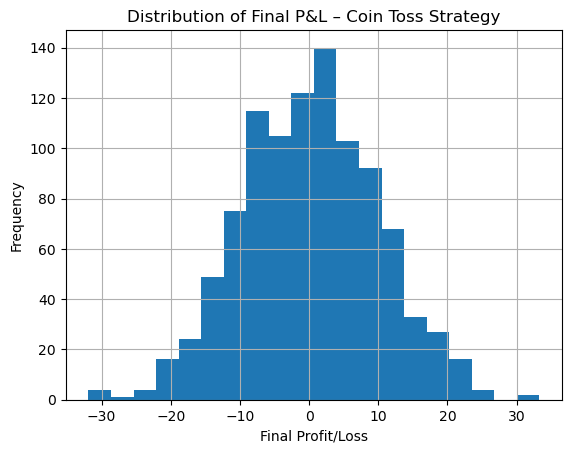

In [4]:
# Histogram of final P&L over multiple simulations
final_pnl = []

for _ in range(1000):  # Run 1000 simulations
    pnl = p_and_l_100()
    cumulative_pnl = list(it.accumulate(pnl))
    final_pnl.append(cumulative_pnl[-1])  # Record the final profit/loss

plt.hist(final_pnl, bins=20)
plt.title("Distribution of Final P&L – Coin Toss Strategy")
plt.xlabel("Final Profit/Loss")
plt.ylabel("Frequency")
plt.grid()
plt.show()
